In [1]:
import numpy as np 
import math 
from itertools import combinations
import matplotlib.pyplot as plt
from scipy.linalg import eigh, block_diag
from tabulate import tabulate



In [2]:
from hubbard_functions import hubb2_model, s2_sub_dim, density_of_states, s2_basis

## 1. Visualizing eigenvalues   
### 1.1. Two electron occupation 

We first see how the eigenvalues of the hubbard look like for a system with one up-spin and one down-spin electron. If there is only one electron or electrons of only one spin type are present in the system, no interaction will take place and the eigenvalues will behave in a way similar to the spinless hubbard model.   
So we consider one up spin and down spin electron and to see how the interaction term affects this model, we plot the eigenvalues for different U.  

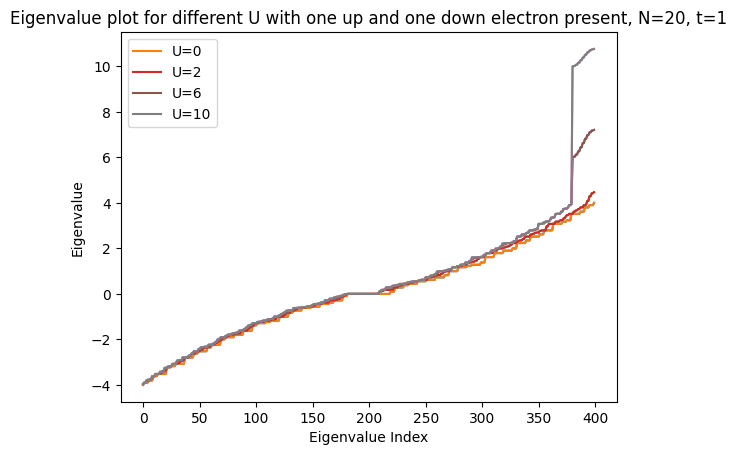

In [3]:
N=20
r_up = 1
r_down = 1
t=1
U_list = [0,2,6,10]
for U in U_list : 
    eigval = hubb2_model(N,r_up,r_down,t,U)[1]
    dim = s2_sub_dim(N,r_up,r_down)
    plt.plot(range(dim),eigval)
    plt.title(f'Eigenvalue plot for different U with one up and one down electron present, N={N}, t={t}')
    plt.xlabel('Eigenvalue Index')
    plt.ylabel('Eigenvalue')
    plt.plot(range(dim),eigval,label=f'U={U}')
    plt.legend()

We can see from the above figure that the most of the eigenvalues are same for different U. The interaction term is effective only in cases where the two electrons are in the same orbital which leads to higher eigenvalues for the system. 

### 1.2. Half-filled (n(up)=n(down))  
Now we take multiple up spin and down spin electrons, specifically, we study the half-filled problem with equal number of up spin and down spin electrons and plot the eigenvalues. 

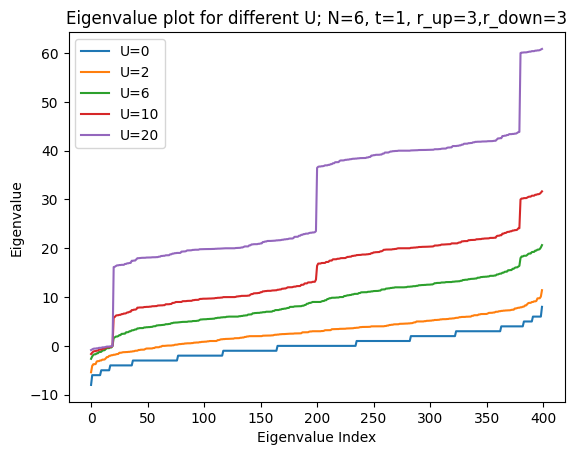

In [4]:
N=6
r_up = N//2
r_down = N//2
t=1
U=2 
U_list = [0,2,6,10,20]
for U in U_list : 
    eigval = hubb2_model(N,r_up,r_down,t,U)[1]
    dim = s2_sub_dim(N,r_up,r_down)
    plt.title(f'Eigenvalue plot for different U; N={N}, t={t}, r_up={r_up},r_down={r_down}')
    plt.xlabel('Eigenvalue Index')
    plt.ylabel('Eigenvalue')
    plt.plot(range(dim),eigval,label=f'U={U}')
    plt.legend()
    

As there are more electrons in this case, there are more chances of electrons being in the same orbital and going through the coulombic repulsion. Hence, we can see that the eigenvalues for different U are significantly different. Bigger interaction term gives higher eigenvalues. 

### 1.3. Half-filled   (n(up) $\neq$ n(down))  

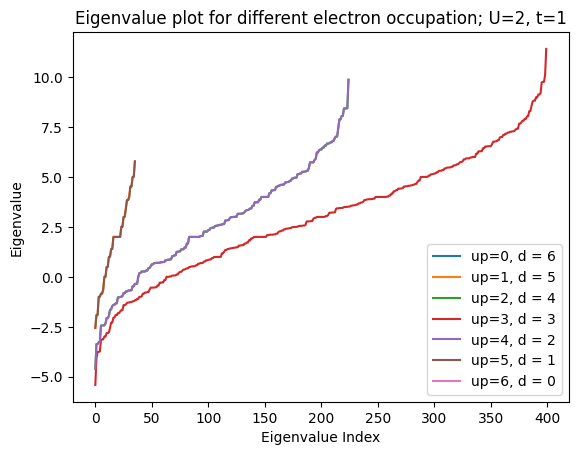

In [5]:
N=6 
U = 2 
t = 1 
num_e = 6
all_eig = []
for x in range(num_e+1) : 
    r_up = x 
    r_down = num_e-x 
    eigval = hubb2_model(N,r_up,r_down,t,U)[1]
    all_eig.append(list(eigval))
    dim = s2_sub_dim(N,r_up,r_down)
    plt.title(f'Eigenvalue plot for different electron occupation; U={U}, t={t}')
    plt.xlabel('Eigenvalue Index')
    plt.ylabel('Eigenvalue')
    plt.plot(range(dim),eigval,label=f'up={r_up}, d = {r_down}')
    plt.legend()


We can see that even if the total number of electrons are same, their spin plays an important part in the dynamics of the lattice system. The number of up spin and down spin electrons decide how many different states the system can be in.   

We can also see that the system remains the same if we flip the spin of all the electrons. This means that the Hubbard model is **spin symmetric**.   

### 1.4. Half-Filled Eigenvalues (all combinations of up and down spin)   
In this case we look at the eigenvalues of all the subspaces of a hubbard model with 6 lattice points. We consider the subspaces and states created by all the possible combinations up and down spin for half-filled case. From 0 up, 6 down to 6 up and 0 down spin configurations. 

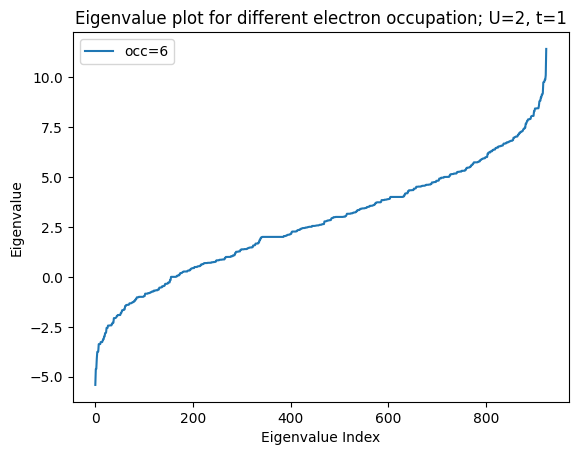

In [6]:
N=6
t=1
U=2
num_e_list = [6]
eigval_superlist = []
for num_e in num_e_list :
    all_eig = []
    for x in range(num_e+1) : 
        r_up = x 
        r_down = N-x
        eigval = hubb2_model(N,r_up,r_down,t,U)[1]
        all_eig.append(list(eigval))
    all_eig_updated = [number for sublist in all_eig for number in sublist]
    eigval_superlist.append(all_eig_updated)
    
for i,eigval_list in enumerate(eigval_superlist) : 
    plt.title(f'Eigenvalue plot for different electron occupation; U={U}, t={t}')
    plt.xlabel('Eigenvalue Index')
    plt.ylabel('Eigenvalue')
    plt.plot(range(len(eigval_list)),sorted(eigval_list),label=f'occ={num_e_list[i]}')
    plt.legend()
        
    

[ 2.  4.  4.  4.  4.  5.  5.  5.  5.  6.  6.  7.  7.  7.  7.  8.  8.  8.
  8. 10.]


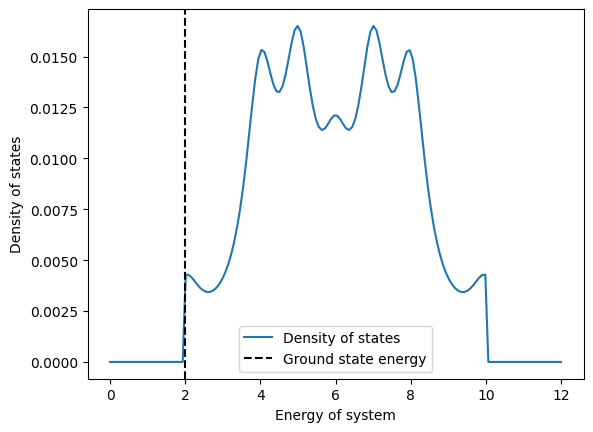

In [7]:
N=6
r_up=3
r_down=6
t=1
U=2

eigval = hubb2_model(N,r_up,r_down,t,U)[1]
print(eigval)
density_of_states(eigval,150,1)

In [8]:
N=3
t = 1 
U =2 
eig_array = []   #contains ground state of all the possible combinations
for r_tot in range(2,2*N-1) : 
    print(r_tot)
    for x in range(1,r_tot) : 
        r_up = x 
        r_down = r_tot-x 
        print(r_up,r_down)
        #ground state of this combination
        eig_x = hubb2_model(N,r_up,r_down,t,U)[2][0]  
        print(eig_x)
        print('------')
    print('=========')
    #all_eig_updated = [number for sublist in eig_x for number in sublist]
    #eig_superlist.append(all_eig_updated)
# print(eig_superlist)
# print(len(eig_superlist))

2
1 1
(-1.799930119434358e-17, 0.40824829046386296, -0.408248290463863, -0.40824829046386313, -5.551115123125783e-17, 0.40824829046386324, 0.4082482904638632, -0.408248290463863, -1.6653345369377348e-16)
------
3
1 2
(0.1876720834350827, 0.18767208343508202, -0.5127296671069506, 0.18767208343508207, -0.512729667106951, 0.18767208343508276, -0.5127296671069508, 0.18767208343508285, 0.187672083435082)
------
2 1
(0.1876720834350827, 0.18767208343508202, -0.5127296671069506, 0.18767208343508207, -0.512729667106951, 0.18767208343508276, -0.5127296671069508, 0.18767208343508285, 0.187672083435082)
------
4
1 3
(0.686351093945969, -0.7261789828314356, 0.03982788888546607)
------
2 2
(-1.3575844901643296e-16, -0.40824829046386296, 0.40824829046386335, 0.40824829046386335, -5.551115123125783e-17, -0.4082482904638636, -0.40824829046386313, 0.40824829046386285, 2.220446049250313e-16)
------
3 1
(0.686351093945969, -0.7261789828314356, 0.03982788888546607)
------


In [9]:
N=3
t = 1 
U =2 
r_up = 1
r_down = 2
s2_basis(N,r_up,r_down)

array([[[ True, False, False],
        [ True,  True, False]],

       [[ True, False, False],
        [ True, False,  True]],

       [[ True, False, False],
        [False,  True,  True]],

       [[False,  True, False],
        [ True,  True, False]],

       [[False,  True, False],
        [ True, False,  True]],

       [[False,  True, False],
        [False,  True,  True]],

       [[False, False,  True],
        [ True,  True, False]],

       [[False, False,  True],
        [ True, False,  True]],

       [[False, False,  True],
        [False,  True,  True]]])